In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('titanic_dataset.csv')

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


##2.Make PassengerId as the index column

In [15]:
data.set_index("PassengerId",inplace=True)

In [16]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##4.Filling all the missing values in dataset

In [17]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [18]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [19]:
data.drop(['Cabin'],axis=1,inplace=True)  ##Droping column 'cabin' as it has about 687 missing values

In [20]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

In [22]:
data["Embarked"].fillna("No value", inplace = True) ##Filling the column 'Embarked' with "no value"

In [23]:
data.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

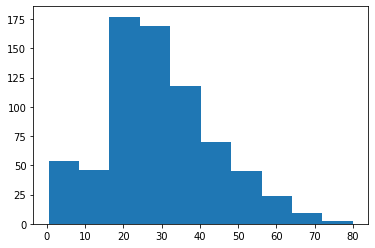

In [24]:
plt.hist(data['Age'])
plt.show()

In [25]:
num_cols=data[['Age']]

In [26]:
num_cols.isna().sum()

Age    177
dtype: int64

In [27]:
from sklearn.impute import SimpleImputer

In [28]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean') ##Filling the missing values in Age with mean
imputer=imputer.fit(num_cols)
num_cols = imputer.transform(num_cols)

In [29]:
num_cols=pd.DataFrame(num_cols,columns=[['Age']])

In [30]:
num_cols.head()

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0


In [31]:
num_cols.index = np.arange(1, len(num_cols) + 1)

In [32]:
num_cols.head()

,Age
1,22.0
2,38.0
3,26.0
4,35.0
5,35.0


In [33]:
num_cols.isna().sum()

Age    0
dtype: int64

In [34]:
data.drop(['Age'],axis=1,inplace=True)

In [35]:
data.head()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S


In [36]:
data=pd.concat([num_cols,data],axis=1) ##joining the num_cols with data

In [37]:
data.isna().sum() ##Removed all the missing values

(Age,)      0
Survived    0
Pclass      0
Name        0
Sex         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

## Handling outliers

##Outlier for fare

Text(0.5, 1.0, 'Boxplot of Fare')

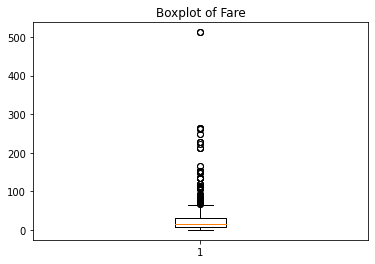

In [38]:
plt.boxplot(data['Fare'])
plt.title('Boxplot of Fare')

In [41]:
Q1=np.percentile(data['Fare'],25,interpolation='midpoint')
Q2=np.percentile(data['Fare'],50,interpolation='midpoint')
Q3=np.percentile(data['Fare'],75,interpolation='midpoint')

In [40]:
print(Q1)
print(Q2)
print(Q3)

7.9104
14.4542
31.0


In [42]:
IQR =Q3-Q1

In [43]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [44]:
print(low_lim)
print(up_lim)

-26.724
65.6344


In [45]:
outlier=[]
for x in data['Fare']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [46]:
outlier

[71.2833,
 263.0,
 146.5208,
 82.1708,
 76.7292,
 80.0,
 83.475,
 73.5,
 263.0,
 77.2875,
 247.5208,
 73.5,
 77.2875,
 79.2,
 66.6,
 69.55,
 69.55,
 146.5208,
 69.55,
 113.275,
 76.2917,
 90.0,
 83.475,
 90.0,
 79.2,
 86.5,
 512.3292,
 79.65,
 153.4625,
 135.6333,
 77.9583,
 78.85,
 91.0792,
 151.55,
 247.5208,
 151.55,
 110.8833,
 108.9,
 83.1583,
 262.375,
 164.8667,
 134.5,
 69.55,
 135.6333,
 153.4625,
 133.65,
 66.6,
 134.5,
 263.0,
 75.25,
 69.3,
 135.6333,
 82.1708,
 211.5,
 227.525,
 73.5,
 120.0,
 113.275,
 90.0,
 120.0,
 263.0,
 81.8583,
 89.1042,
 91.0792,
 90.0,
 78.2667,
 151.55,
 86.5,
 108.9,
 93.5,
 221.7792,
 106.425,
 71.0,
 106.425,
 110.8833,
 227.525,
 79.65,
 110.8833,
 79.65,
 79.2,
 78.2667,
 153.4625,
 77.9583,
 69.3,
 76.7292,
 73.5,
 113.275,
 133.65,
 73.5,
 512.3292,
 76.7292,
 211.3375,
 110.8833,
 227.525,
 151.55,
 227.525,
 211.3375,
 512.3292,
 78.85,
 262.375,
 71.0,
 86.5,
 120.0,
 77.9583,
 211.3375,
 79.2,
 69.55,
 120.0,
 93.5,
 80.0,
 83.1583,
 6

In [47]:

ind = data['Fare']>up_lim

In [48]:
data.loc[ind].index

Int64Index([  2,  28,  32,  35,  53,  62,  63,  73,  89, 103,
            ...
            793, 803, 821, 830, 836, 847, 850, 857, 864, 880],
           dtype='int64', length=116)

In [49]:
data.drop([2,  28,  32,  35,  53,  62,  63,  73,  89, 103,793, 803, 821, 830, 836, 847, 850, 857, 864, 880],inplace=True)

In [50]:
data.head(15)

,"(Age,)",Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
1,22.000000,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
3,26.000000,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
4,35.000000,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
5,35.000000,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
6,29.699118,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
7,54.000000,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
8,2.000000,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S
9,27.000000,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S
10,14.000000,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C
11,4.000000,1,3,"Sandstrom, Miss. Marguerite Rut",female,1,1,PP 9549,16.7000,S


##Outlier for SibSp

Text(0.5, 1.0, 'Boxplot of SibSp')

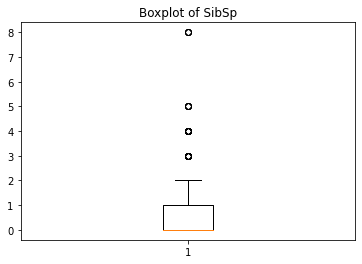

In [51]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot of SibSp')

In [52]:
Q1=np.percentile(data['SibSp'],25,interpolation='midpoint')
Q2=np.percentile(data['SibSp'],50,interpolation='midpoint')
Q3=np.percentile(data['SibSp'],75,interpolation='midpoint')

In [53]:
print(Q1)
print(Q2)
print(Q3)

0.0
0.0
1.0


In [54]:
IQR =Q3-Q1

In [55]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [56]:
print(low_lim)
print(up_lim)

-1.5
2.5


In [57]:
outlier=[]
for x in data['SibSp']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [58]:
outlier

[3,
 4,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 4,
 8,
 4,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 5,
 3,
 5,
 3,
 4,
 4,
 3,
 3,
 5,
 4,
 3,
 4,
 4,
 3,
 4,
 4]

In [59]:

ind = data['SibSp']>up_lim

In [60]:
data.loc[ind].index

Int64Index([  8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 160, 165, 172,
            177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
            410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 814, 820,
            825, 851],
           dtype='int64')

In [61]:
data.drop([8,  17,  25,  51,  60,  64,  69,  72,  86, 120, 160, 165, 172,
            177, 181, 183, 202, 230, 234, 262, 267, 279, 325, 342, 375, 387,
            410, 481, 486, 542, 543, 635, 643, 684, 687, 727, 788, 814, 820,
            825, 851],inplace=True)

In [62]:
data.head(15)

,"(Age,)",Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked
1,22.000000,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S
3,26.000000,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S
4,35.000000,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S
5,35.000000,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S
6,29.699118,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q
7,54.000000,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S
9,27.000000,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S
10,14.000000,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C
11,4.000000,1,3,"Sandstrom, Miss. Marguerite Rut",female,1,1,PP 9549,16.7000,S
12,58.000000,1,1,"Bonnell, Miss. Elizabeth",female,0,0,113783,26.5500,S


##Outlier for Pclass

Text(0.5, 1.0, 'Boxplot of Pclass')

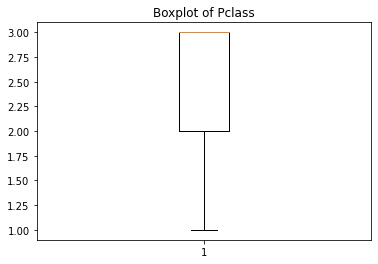

In [63]:
plt.boxplot(data['Pclass'])
plt.title('Boxplot of Pclass')

In [64]:
Q1=np.percentile(data['Pclass'],25,interpolation='midpoint')
Q2=np.percentile(data['Pclass'],50,interpolation='midpoint')
Q3=np.percentile(data['Pclass'],75,interpolation='midpoint')

In [65]:
print(Q1)
print(Q2)
print(Q3)

2.0
3.0
3.0


In [66]:
IQR =Q3-Q1

In [67]:
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR

In [68]:
print(low_lim)
print(up_lim)

0.5
4.5


In [69]:
outlier=[]
for x in data['Pclass']:
  if((x>up_lim)or (x<low_lim)):
    outlier.append(x)

In [70]:
outlier

[]

##Min Max scaling of Survived column

In [71]:

from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing


In [72]:
scaler =preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(data)
data_scaled = pd.DataFrame(data_scaled, columns=[ 'Survived'])
print("Scaled Dataset Using MinMaxScaler")
data_scaled.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


ValueError: ignored